# Logistic Regression (Binary Classification)

(Below images are the course slides of DeepLearning.AI's MLS on Coursera)

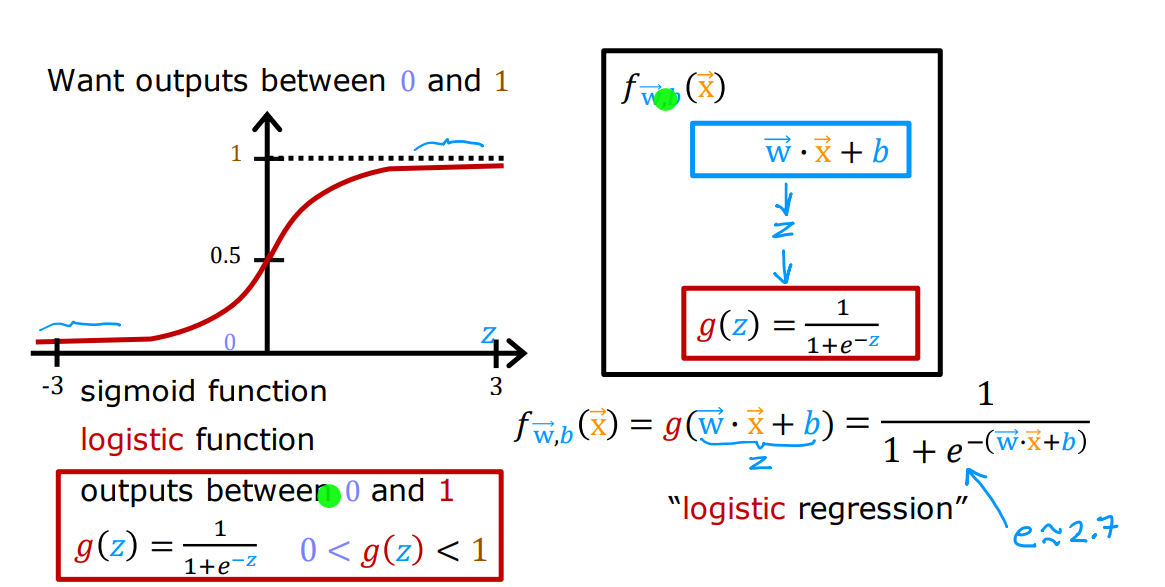

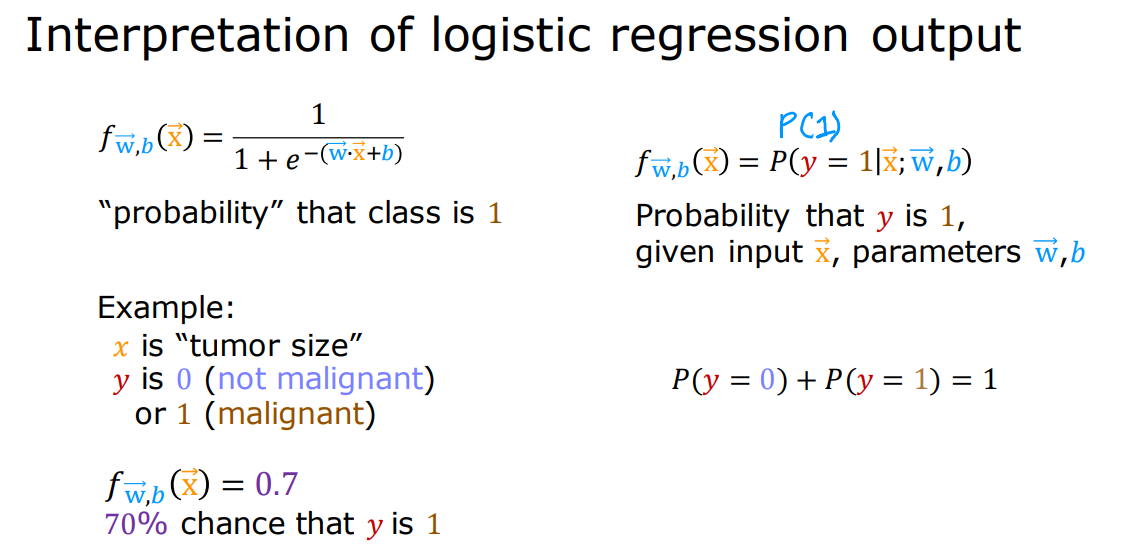

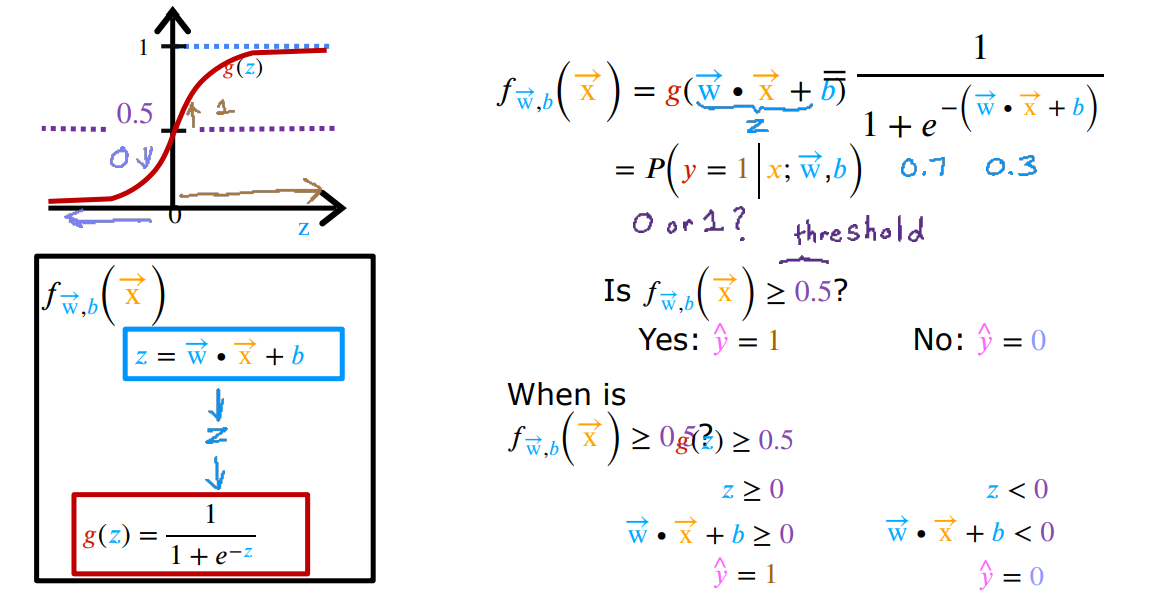

- $m$ is the number of training examples.

- $n$ is the number of features.

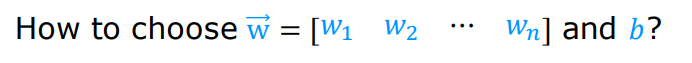

## Cost Function & Gradient Descent

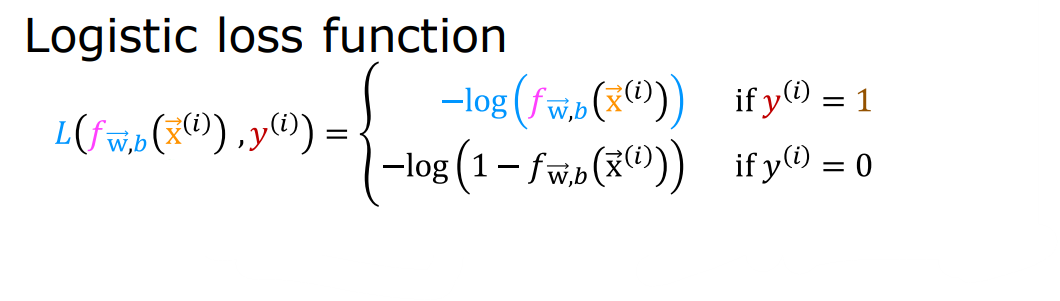

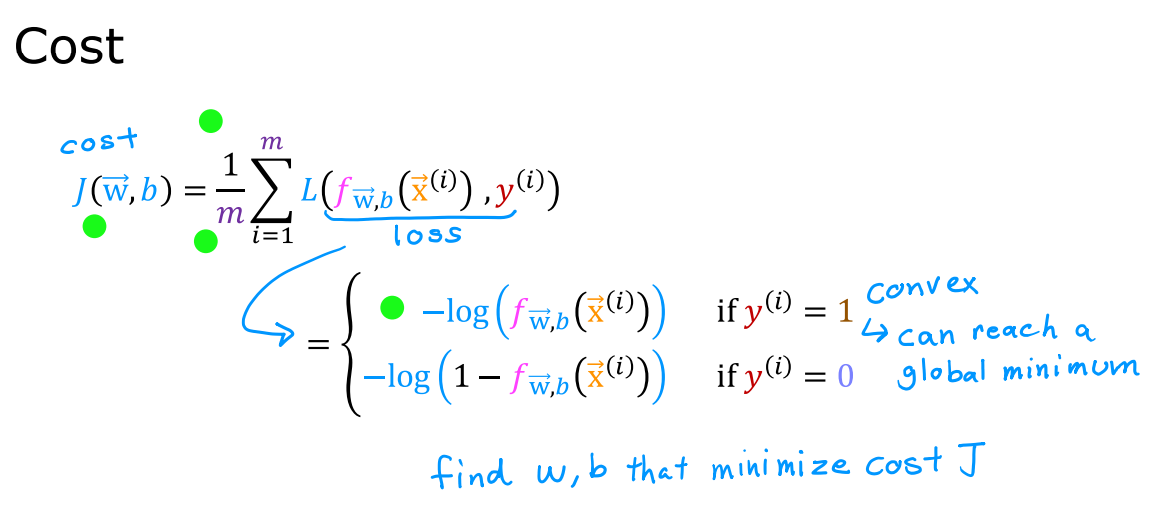

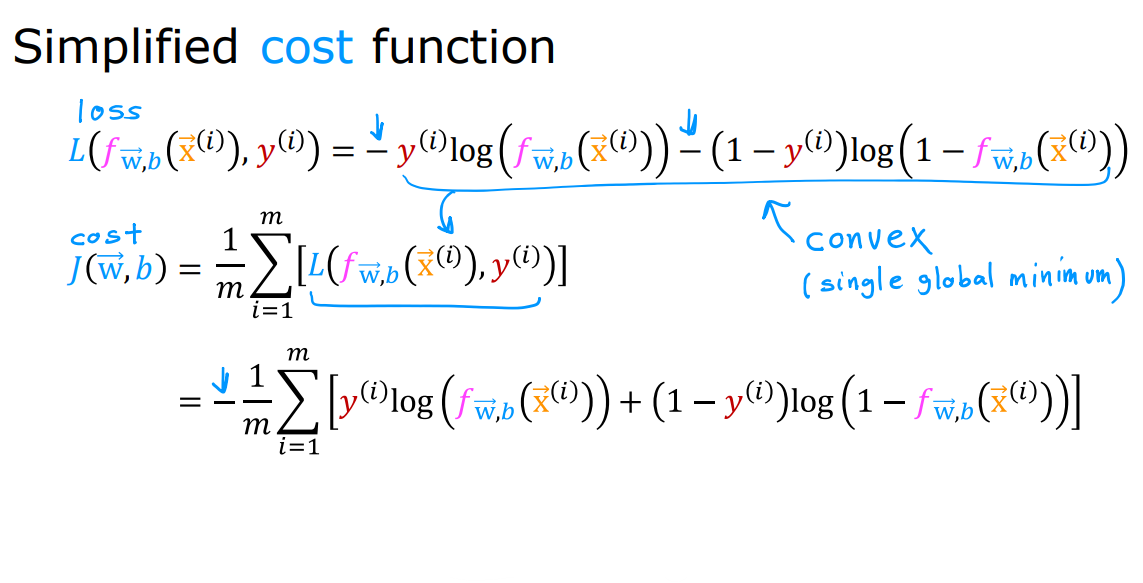

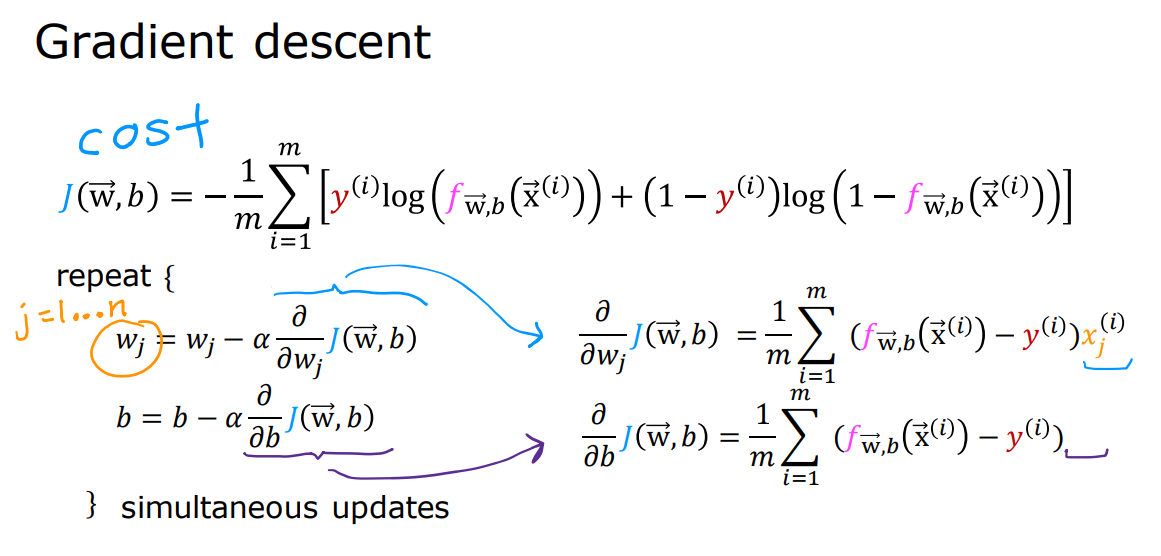

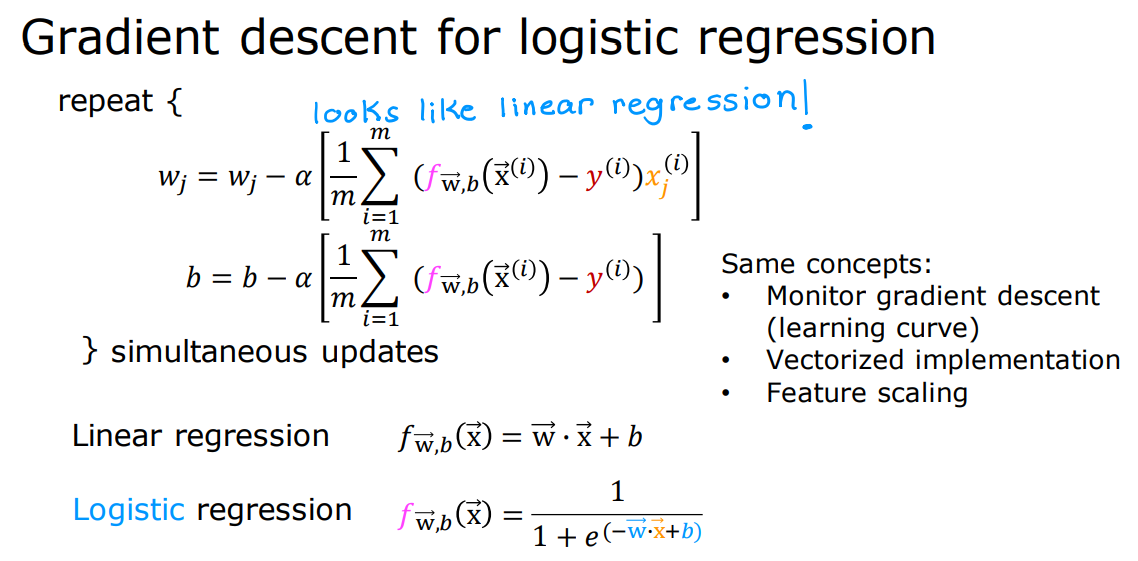

> **NOTE:** To avoid the problem of **overfitting**, you might want to use **Regularization** concept.

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [5]:
# get features, and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
print(type(X))
print(len(X))
print(X)

<class 'numpy.ndarray'>
400
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [ 

In [7]:
print(type(y))
print(len(y))
print(y)

<class 'numpy.ndarray'>
400
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [8]:
# split into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [9]:
print(len(X_train), type(X_train))
print(X_train)

320 <class 'numpy.ndarray'>
[[    29  28000]
 [    45  22000]
 [    46 117000]
 [    32  18000]
 [    22  81000]
 [    25  87000]
 [    48  33000]
 [    35  58000]
 [    47  23000]
 [    26  32000]
 [    32 135000]
 [    60  34000]
 [    52  21000]
 [    38  55000]
 [    25  90000]
 [    58  38000]
 [    49  88000]
 [    37  78000]
 [    35  77000]
 [    34  43000]
 [    20  49000]
 [    46  88000]
 [    31  34000]
 [    47  30000]
 [    35  50000]
 [    39  96000]
 [    33 113000]
 [    49  86000]
 [    45  79000]
 [    44  39000]
 [    41  59000]
 [    42  53000]
 [    35  73000]
 [    41  72000]
 [    27  96000]
 [    30 116000]
 [    41  52000]
 [    41  52000]
 [    20  82000]
 [    46  41000]
 [    27  31000]
 [    35  71000]
 [    49  28000]
 [    35  91000]
 [    37  75000]
 [    32 117000]
 [    36  75000]
 [    20  86000]
 [    38  50000]
 [    49  36000]
 [    40  65000]
 [    37  77000]
 [    60  46000]
 [    48 138000]
 [    40  71000]
 [    36  63000]
 [    26  81000]
 [ 

In [10]:
print(len(y_train), type(y_train))
print(y_train)

320 <class 'numpy.ndarray'>
[0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1
 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0]


In [11]:
print(len(X_test), type(X_test))
print(X_test)

80 <class 'numpy.ndarray'>
[[    36  33000]
 [    39  61000]
 [    36 118000]
 [    39 122000]
 [    26 118000]
 [    38  65000]
 [    20  36000]
 [    49  89000]
 [    31  18000]
 [    48 141000]
 [    34  72000]
 [    39  73000]
 [    35  72000]
 [    48 131000]
 [    53  82000]
 [    56 133000]
 [    60  83000]
 [    27  58000]
 [    28  87000]
 [    60 102000]
 [    40  75000]
 [    50  88000]
 [    44 139000]
 [    47  43000]
 [    45  26000]
 [    26  15000]
 [    58  47000]
 [    49  74000]
 [    53  34000]
 [    52 114000]
 [    39  42000]
 [    19  76000]
 [    18  86000]
 [    57  74000]
 [    27  84000]
 [    30  80000]
 [    22  18000]
 [    32  86000]
 [    50  20000]
 [    19  25000]
 [    47 144000]
 [    58 101000]
 [    34 115000]
 [    23  66000]
 [    56  60000]
 [    31 118000]
 [    48  35000]
 [    47 113000]
 [    39  79000]
 [    52  38000]
 [    24  58000]
 [    37  53000]
 [    42  80000]
 [    46  28000]
 [    42  73000]
 [    37  62000]
 [    60  42000]
 [  

In [12]:
print(len(y_test), type(y_test))
print(y_test)

80 <class 'numpy.ndarray'>
[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0]


In [13]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
print(X_train)

[[-0.80330081 -1.19121795]
 [ 0.75697997 -1.36859801]
 [ 0.85449752  1.43991958]
 [-0.51074816 -1.48685138]
 [-1.48592365  0.37563923]
 [-1.19337101  0.55301929]
 [ 1.04953262 -1.04340124]
 [-0.21819552 -0.30431766]
 [ 0.95201507 -1.33903467]
 [-1.09585346 -1.07296458]
 [-0.51074816  1.97205975]
 [ 2.21974321 -1.0138379 ]
 [ 1.43960282 -1.39816136]
 [ 0.07435713 -0.39300769]
 [-1.19337101  0.64170932]
 [ 2.02470811 -0.89558452]
 [ 1.14705017  0.58258263]
 [-0.02316042  0.2869492 ]
 [-0.21819552  0.25738586]
 [-0.31571307 -0.74776781]
 [-1.68095875 -0.57038775]
 [ 0.85449752  0.58258263]
 [-0.60826571 -1.0138379 ]
 [ 0.95201507 -1.13209127]
 [-0.21819552 -0.54082441]
 [ 0.17187468  0.81908937]
 [-0.41323061  1.32166621]
 [ 1.14705017  0.52345594]
 [ 0.75697997  0.31651254]
 [ 0.65946243 -0.86602118]
 [ 0.36690978 -0.27475432]
 [ 0.46442733 -0.45213438]
 [-0.21819552  0.13913248]
 [ 0.36690978  0.10956914]
 [-0.99833591  0.81908937]
 [-0.70578326  1.41035623]
 [ 0.36690978 -0.48169772]
 

In [15]:
print(X_test)

[[-0.12067797 -1.04340124]
 [ 0.17187468 -0.21562763]
 [-0.12067797  1.46948292]
 [ 0.17187468  1.58773629]
 [-1.09585346  1.46948292]
 [ 0.07435713 -0.09737426]
 [-1.68095875 -0.95471121]
 [ 1.14705017  0.61214597]
 [-0.60826571 -1.48685138]
 [ 1.04953262  2.14943981]
 [-0.31571307  0.10956914]
 [ 0.17187468  0.13913248]
 [-0.21819552  0.10956914]
 [ 1.04953262  1.85380638]
 [ 1.53712037  0.40520257]
 [ 1.82967301  1.91293307]
 [ 2.21974321  0.43476591]
 [-0.99833591 -0.30431766]
 [-0.90081836  0.55301929]
 [ 2.21974321  0.99646943]
 [ 0.26939223  0.19825917]
 [ 1.24456772  0.58258263]
 [ 0.65946243  2.09031313]
 [ 0.95201507 -0.74776781]
 [ 0.75697997 -1.25034464]
 [-1.09585346 -1.57554141]
 [ 2.02470811 -0.62951444]
 [ 1.14705017  0.16869583]
 [ 1.53712037 -1.0138379 ]
 [ 1.43960282  1.35122955]
 [ 0.17187468 -0.77733115]
 [-1.7784763   0.22782251]
 [-1.87599385  0.52345594]
 [ 1.92719056  0.16869583]
 [-0.99833591  0.46432926]
 [-0.70578326  0.34607588]
 [-1.48592365 -1.48685138]
 

In [16]:
def sigmoid(z):
    '''
    Input: A number.
    Returns the value of sigmoid function.
    '''
    f = 1 / (1 + np.exp(-z))
    return f

In [36]:
class LogisticRegression():
    
    def __init__(self):
        self.w = None # weights
        self.b = None # bias
        self.n = None # number of features
        self.m = None # number of training examples
        # utility variables:
        self.threshold_prediction = 0.5
        self.num_itr = int(1e6)
        self.threshold_gradient_descent = 0.001
        self.alpha = 0.001
        
    def predict(self, x_new):
        z = np.dot(self.w, x_new) + self.b
        f = sigmoid(z)
        return f
    
    def predict_multiple(self, x_new):
        y_pred = list(map(lambda x: self.predict(x), x_new))
        sz = len(y_pred)
        for i in range(sz):
            if y_pred[i] >= self.threshold_prediction:
                y_pred[i] = 1
            else:
                y_pred[i] = 0
        return np.array(y_pred)
    
    def compute_loss(self, x_i, y_i):
        y_hat_i = self.predict(x_i)
        loss = (y_i * np.log(y_hat_i)) + ((1 - y_i) * np.log(1 - y_hat_i))
        loss *= (-1)
        return loss
    
    def compute_cost(self, X, y):
        total_cost = 0
        for i in range(self.m):
            x_i = X[i]
            y_actual_i = y[i]
            total_cost += self.compute_loss(x_i, y_actual_i)
        total_cost /= self.m
        return total_cost
    
    def compute_gradient(self, X, y):
        dj_dw = [0 for i in range(self.n)]
        dj_db = 0
        for j in range(self.n):
            dj_dw_j = 0
            for i in range(self.m):
                x_i = X[i]
                x_i_j = X[i][j]
                y_actual_i = y[i]
                y_hat_i = self.predict(x_i)
                dj_dw_j += (x_i_j * (y_hat_i - y_actual_i))
                dj_db += (y_hat_i - y_actual_i)
            dj_dw[j] = dj_dw_j
        return np.array(dj_dw), dj_db
    
    def run_gradient_descent(self, X, y):
        # set random initial values for parameters
        self.w = np.zeros(self.n)
        self.b = 0
        prev_w = np.zeros(self.n)
        prev_b = 0
        for i in range(self.num_itr):
            dj_dw, dj_db = self.compute_gradient(X, y)
            self.w = self.w - self.alpha * dj_dw
            self.b = self.b - self.alpha * dj_db
            cost = self.compute_cost(X, y)
            if i == 0 or (i + 1) % 10 == 0:
                print(f'Iteration {i + 1}; Cost = {cost}')
            if i == self.num_itr - 1:
                print(f'Final Cost = {cost}')
            stopGD = False
            if abs(prev_b - self.b) <= self.threshold_gradient_descent:
                stopGD = True
            if (abs(prev_w - self.w) <= self.threshold_gradient_descent).all():
                stopGD = True
            if stopGD:
                print('Terminating Gradient Descent as parameters are almost not changing')
                print(f'Final Cost = {cost}')
                break
            prev_w, prev_b = self.w, self.b
        print(f'Learned Parameters: w = {self.w}; b = {self.b}')
        
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.run_gradient_descent(X, y)

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

Iteration 1; Cost = 0.643934487112001
Iteration 10; Cost = 0.4587012953344024
Iteration 20; Cost = 0.401828381723885
Iteration 30; Cost = 0.37707163466089705
Iteration 40; Cost = 0.36349951975496836
Iteration 50; Cost = 0.3550959751739982
Iteration 60; Cost = 0.3494859256171866
Iteration 70; Cost = 0.3455447030115125
Iteration 80; Cost = 0.34267216749852536
Iteration 90; Cost = 0.34051974460768797
Iteration 100; Cost = 0.33887175362596866
Iteration 110; Cost = 0.33758804766683925
Iteration 120; Cost = 0.33657394576706795
Iteration 130; Cost = 0.335763426230935
Iteration 140; Cost = 0.33510923005005816
Iteration 150; Cost = 0.33457677655034
Iteration 160; Cost = 0.33414028463175605
Iteration 170; Cost = 0.33378022243595445
Terminating Gradient Descent as parameters are almost not changing
Final Cost = 0.33378022243595445
Learned Parameters: w = [2.28420614 1.30069231]; b = -1.1594819621348456


In [38]:
y_pred = model.predict_multiple(X_test)

In [39]:
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(df)

    Actual  Predicted
0        0          0
1        0          0
2        1          1
3        1          1
4        0          0
..     ...        ...
75       1          1
76       0          0
77       0          0
78       0          0
79       0          0

[80 rows x 2 columns]


In [41]:
# print confusion matrix & view accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)

[[41  7]
 [ 6 26]]
0.8375
